<b>Imports of required libraries</b>

In [2]:
import os
import numpy as np
import pandas
import statsmodels.api
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest, ks_2samp, shapiro

<b>1. Cumulative distribution plot for specified sample</b>

Text(0, 0.5, 'Likelihood of occurrence')

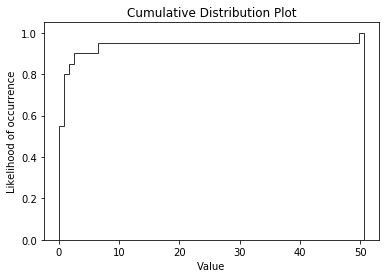

In [3]:
controlB = [0.08, 0.10, 0.15, 0.17, 0.24, 0.34, 0.38, 0.42, 0.49, 0.50,
            0.70, 0.94, 0.95, 1.26, 1.37, 1.55, 1.75, 3.20, 6.98, 50.57]
plt.hist(controlB, 'fd', density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')
plt.title('Cumulative Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Likelihood of occurrence')

<b>2. Cumulative distribution plot with logarithmic values on x axis</b>

Text(0, 0.5, 'Likelihood of occurrence')

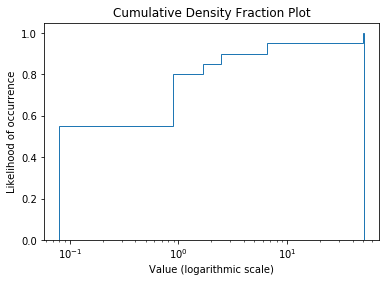

In [4]:
controlB = [0.08, 0.10, 0.15, 0.17, 0.24, 0.34, 0.38, 0.42, 0.49, 0.50,
            0.70, 0.94, 0.95, 1.26, 1.37, 1.55, 1.75, 3.20, 6.98, 50.57]
#plt.hist(controlB, density=True, cumulative=True, label='CDF', histtype='step', alpha=0.8, color='k')
plt.hist(controlB, 'fd', density=True, histtype='step',
                           cumulative=True, label='Empirical')
plt.xscale('log')
plt.title('Cumulative Density Fraction Plot')
plt.xlabel('Value (logarithmic scale)')
plt.ylabel('Likelihood of occurrence')

<b>3. Kolmogorov-Smirnov test for two specified samples</b>

Text(0, 0.5, 'Likelihood of occurrence')

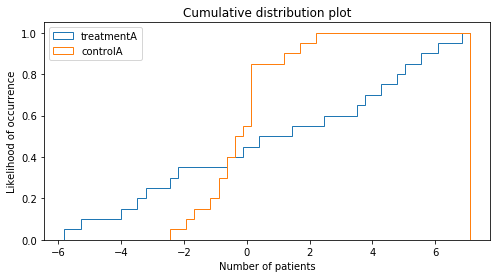

In [5]:
controlA = [0.22, -0.87, -2.39, -1.79, 0.37, -1.54, 1.28, -0.31,
-0.74, 1.72, 0.38, -0.17, -0.62 , -1.10, 0.30, 0.15,
2.30, 0.19, -0.50, -0.09]

treatmentA = [-5.13, -2.19, -2.43, -3.83, 0.50, -3.25, 4.32, 1.63,
5.18, -0.43, 7.11, 4.87, -3.10, -5.81, 3.76, 6.31,
2.58, 0.07, 5.76, 3.50]

fig, ax = plt.subplots(figsize=(8, 4))

n, bins, patches = ax.hist(treatmentA, 50, density=True, histtype='step',
                           cumulative=True, label='treatmentA')

ax.hist(controlA, bins=bins, density=True, histtype='step',
                           cumulative=True, label='controlA')

ax.legend(loc='upper left')
ax.set_title('Cumulative distribution plot')
ax.set_xlabel('Number of patients')
ax.set_ylabel('Likelihood of occurrence')

In [6]:
stat, p = ks_2samp(treatmentA, controlA)
print('Maximum distance between two cumulative distribution plots: \t {0}'.format(stat))

Maximum distance between two cumulative distribution plots: 	 0.45


<b>4. Checking the simmilarity and normality of the distributions of two samples</b>

In [9]:
df = pandas.read_csv(os.path.join('dane_listy_3_-_5', 'pacjenci.csv'))

df_women = df[df['plec'] == 'K']
df_men = df[df['plec'] == 'M']

stat, p = ks_2samp(sorted(df_women['wzrost']), sorted(df_men['wzrost']))

alpha = 0.05

print('\nH0: both samples are from the same distribution')

print('p-value: {0}'.format(p))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')

print('\nH0: Women sample distribution comes from gaussian distribution')

norm.fit(df_women)

stat, p = kstest(sorted(df_women['wzrost']), 'norm', args=)

print('p-value: {0}'.format(p))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

print('\nH0: Men sample distribution comes from gaussian distribution')

stat, p = kstest(sorted(df_men['wzrost']), 'norm')

print('p-value: {0}'.format(p))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')



H0: both samples are from the same distribution
p-value: 0.9920496894409938
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis

H0: Women sample distribution comes from gaussian distribution
p-value: 0.0
Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

H0: Men sample distribution comes from gaussian distribution
p-value: 0.0
Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis


<b>5. Kolmogorov-Smirnov test, ttest and then cumulative fraction plot</b>

In [8]:
delikates = [23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8, 24.1, 18.7, 16.3, 20.3, 14.9, 35.4,21.6, 21.2, 21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5, 16.6, 1, 21.7, 1, 23.6, 1, 25.7,19.3, 46.9, 23.3, 21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5, 23.3, 18.6, 22.0, 29.8,33.3, 1, 21.3, 18.6, 26.8, 19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4, 22.6, 1, 35.3, 7.0,19.3, 21.3, 10.1, 20.2, 1, 36.2, 16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5]

renety = [16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0, 21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7, 34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2, 13.8, 29.7,23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1, 26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3,13.2, 22.5, 25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3, 19.9, 18.2, 26.2, 20.4,23.3, 26.7, 26.0, 1, 25.1, 33.1, 35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7]



<b>10. Choose right normality test for specified data (Lillefors test, because Kolmogorv-Smirnov and Anderson-Darling requires known population mean and standard deviation, Shapiro-Wilk is said by the authors to be best for samples with less than 20 values)</b>